In [2]:
"""
以下代码参考了 https://www.kaggle.com/mlg-ulb/creditcardfraud 的若干案例
向原作者致谢！
"""
#工作包准备
print('*'*45)
print('工作包准备:')
print('*'*45)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#中文图表显示字体以及坐标轴负号显示设置
plt.rcParams['font.sans-serif']=['SimHei'] 
plt.rcParams['axes.unicode_minus'] = False 

import matplotlib.gridspec as gridspec
import seaborn as sns; 
plt.style.use('ggplot')

import sklearn
#预处理，对数据做均值和方差归一
from sklearn.preprocessing import StandardScaler
#用于将整个数据集划分成训练集和测试集
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
#用于输出混淆矩阵
from sklearn.metrics import confusion_matrix

*********************************************
工作包准备:
*********************************************


AttributeError: module 'numpy' has no attribute '__version__'


*********************************************
读入交易数据，显示数据概况:
*********************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 n

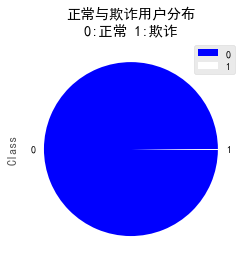

In [4]:
#数据概况
print()
print('*'*45)
print('读入交易数据，显示数据概况:')
print('*'*45)
#crecreditcard_data=pd.read_csv('./Section6 creditcard')
FraudDetction=pd.read_csv('creditcard.csv')
FraudDetction.info()
FraudDetction.describe()

# 看看欺诈交易与正常交易的数据量对比
label_distr=pd.value_counts(FraudDetction['Class'],sort=True).sort_index()
# 统计欺诈与正常交易的总数
label_distr.value_counts()
#绘制饼图
label_distr.plot.pie(legend='True',colors=['b','w'],
                 title='正常与欺诈用户分布\n0:正常 1:欺诈')
plt.savefig('ch17_01.png',dpi=300,bbox_inches='tight')
plt.show()

*********************************************
查看正常/欺诈交易发生数量与交易时间的关系:
*********************************************
正常
count    284315.000000
mean      94838.202258
std       47484.015786
min           0.000000
25%       54230.000000
50%       84711.000000
75%      139333.000000
max      172792.000000
Name: Time, dtype: float64
-------------------------
欺诈
count       492.000000
mean      80746.806911
std       47835.365138
min         406.000000
25%       41241.500000
50%       75568.500000
75%      128483.000000
max      170348.000000
Name: Time, dtype: float64

交易量与时间的关系：



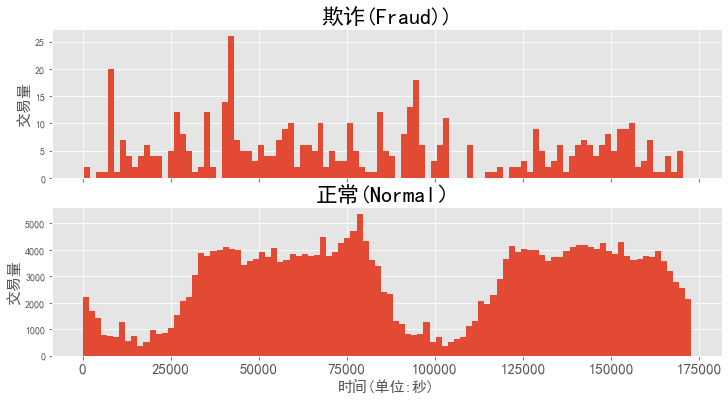

In [5]:
#查看正常/欺诈交易与交易时间的关系
print('*'*45)
print('查看正常/欺诈交易发生数量与交易时间的关系:')
print('*'*45)

# 查看二者的描述性统计,与时间的序列分布关系
print('正常')
print(FraudDetction.Time[FraudDetction.Class == 0].describe())
print('-'*25)
print('欺诈')
print(FraudDetction.Time[FraudDetction.Class == 1].describe())

f,(ax1,ax2)=plt.subplots(2,1,sharex=True,figsize=(12,6))
bins=100

ax1.hist(FraudDetction.Time[FraudDetction.Class == 1],bins=bins)
ax1.set_title('欺诈(Fraud))',fontsize=22)
ax1.set_ylabel('交易量',fontsize=15)

ax2.hist(FraudDetction.Time[FraudDetction.Class == 0],bins=bins)
ax2.set_title('正常(Normal）',fontsize=22)
ax2.set_ylabel('交易量',fontsize=15)

plt.xlabel('时间(单位:秒)',fontsize=15)
plt.xticks(fontsize=15)

print()
print('交易量与时间的关系：')
print()
plt.savefig('ch17_02.png',dpi=300,bbox_inches='tight')
plt.show()


*********************************************
查看正常/欺诈交易发生数量与单笔交易金额的关系:
*********************************************
正常
count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64
-------------------------
欺诈
count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

交易量与交易金额的关系：


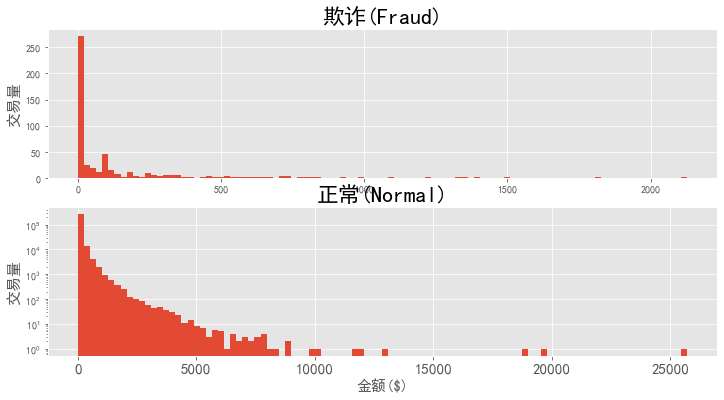

In [6]:
#查看真实/欺诈交易与交易金额的关系
print()
print('*'*45)
print("查看正常/欺诈交易发生数量与单笔交易金额的关系:")
print('*'*45)
# 查看二者的描述性统计,与金额的序列分布关系
print('正常')
print(FraudDetction.Amount[FraudDetction.Class==0].describe())
print('-'*25)
print('欺诈')
print(FraudDetction.Amount[FraudDetction.Class ==1].describe())

f,(ax1,ax2)=plt.subplots(2,1,sharex=False,figsize=(12,6))
bins=100

ax1.hist(FraudDetction.Amount[FraudDetction.Class == 1],bins=bins)
ax1.set_title('欺诈(Fraud)',fontsize=22)
ax1.set_ylabel('交易量',fontsize=15)

ax2.hist(FraudDetction.Amount[FraudDetction.Class == 0],bins=bins)
ax2.set_title('正常(Normal)',fontsize=22)
ax2.set_ylabel('交易量',fontsize=15)

plt.xlabel('金额($)',fontsize=15)
plt.xticks(fontsize=15)
#因为金额数据跨度过大，因此y轴调整成对数坐标
plt.yscale('log')

print()
print('交易量与交易金额的关系：')
plt.savefig('ch17_03.png',dpi=300,bbox_inches='tight')
plt.show()


*********************************************
查看正常/欺诈交易在各属性下的分布关系:
*********************************************


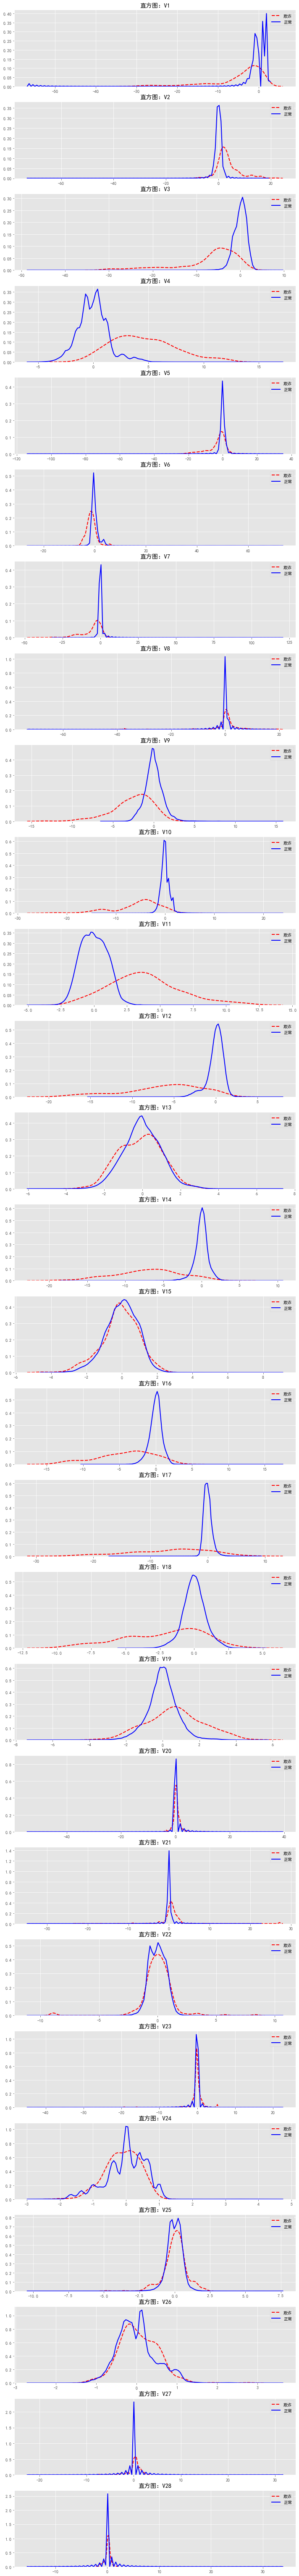

In [7]:
#分别查看28个属性与正常/欺诈的分类标签之间的联系是否紧密
#两个曲线越是趋向一致，说明该属性越难以区分正常或者欺诈交易
#两个曲线越是差别大，说明该属性的取值对正常/欺诈交易的区分越明显
#下列代码输出结果中的“直方图V14”，正常/欺诈交易的分布区别很明显
#而“直方图V15”，正常/欺诈交易的分布就基本重合
print()
print('*'*45)
print('查看正常/欺诈交易在各属性下的分布关系:')
print('*'*45)
v_features=[x for x in FraudDetction.columns 
            if x not in ['Time','Amount','Class']]
plt.figure(figsize=(12,28*4))
gs =gridspec.GridSpec(28,1)

import warnings
warnings.filterwarnings('ignore')

for i,cn in enumerate(FraudDetction[v_features]):
    ax=plt.subplot(gs[i])
    sns.distplot(FraudDetction[cn][FraudDetction.Class==1],
                 hist=False,bins=50,kde=True,label="欺诈",
                 kde_kws={"color": "r", "lw": 2, 'linestyle':'--'},)
    sns.distplot(FraudDetction[cn][FraudDetction.Class==0],
                 hist=False,bins=50,kde=True,label="正常",
                 kde_kws={"color": "b", "lw": 2, 'linestyle':'-'},)
    ax.set_xlabel('')
    ax.set_title('直方图：'+str(cn))
plt.savefig('ch17_04.png',dpi=300,bbox_inches='tight')
plt.show()

In [8]:
#分别调用逻辑回归、随机森林、支持向量SVM三种Scikit内建的模型
#数据按7：3的比例生产训练和测试数据集分组
print()
print('*'*45)
print('模型训练数据准备:')
print('*'*45)
Fraud=FraudDetction[FraudDetction.Class == 1]
Normal=FraudDetction[FraudDetction.Class == 0]

# 训练特征集
x_train=Fraud.sample(frac=0.7)
x_train=pd.concat([x_train,Normal.sample(frac=0.7)],axis=0)
# 测试特征集
x_test=FraudDetction.loc[~FraudDetction.index.isin(x_train.index)]

# 标签集
y_train=x_train.Class
y_test=x_test.Class

# 去掉特征集里的标签和时间列
x_train=x_train.drop(['Class','Time'],axis=1)
x_test=x_test.drop(['Class','Time'],axis=1)
# 查看数据结构
print('训练数据结构：',x_train.shape,y_train.shape)
print('测试数据结构：',x_test.shape,y_test.shape)

#导入日期时间包，用于算法训练时间分析
import datetime


*********************************************
模型训练数据准备:
*********************************************
训练数据结构： (199364, 29) (199364,)
测试数据结构： (85443, 29) (85443,)


In [9]:
#逻辑回归方法
print()
print('*'*45)
print('逻辑回归')
print('*'*45)
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (precision_recall_curve,auc,roc_auc_score,
roc_curve,recall_score,classification_report)

#构造逻辑回归模型
lrmodel = LogisticRegression(penalty='l2')
#训练模型
start=datetime.datetime.now()
lrmodel.fit(x_train, y_train)
end=datetime.datetime.now()

#查看混淆矩阵
ypred_lr=lrmodel.predict(x_test)
print('confusion_matrix')
print(metrics.confusion_matrix(y_test,ypred_lr))

#查看预测精度与决策覆盖面
print('Accuracy:%f'%(metrics.accuracy_score(y_test,ypred_lr)))
print('Area under the curve:%f'%(metrics.roc_auc_score(y_test,ypred_lr)))
print('Runtime =',end-start) 


*********************************************
逻辑回归
*********************************************
confusion_matrix
[[85278    17]
 [   50    98]]
Accuracy:0.999216
Area under the curve:0.830981
Runtime = 0:00:02.974881


In [10]:
#随机森林模型
print()
print('*'*45)
print('随机森林')
print('*'*45)
from sklearn.ensemble import RandomForestClassifier

#构造随机森林模型
rfmodel=RandomForestClassifier()
#训练模型
start=datetime.datetime.now()
rfmodel.fit(x_train,y_train)
end=datetime.datetime.now()

#查看混淆矩阵
ypred_rf=rfmodel.predict(x_test)
print('confusion_matrix')
print(metrics.confusion_matrix(y_test,ypred_rf))

#查看预测精度与决策覆盖面
print('Accuracy:%f'%(metrics.accuracy_score(y_test,ypred_rf)))
print('Area under the curve:%f'%(metrics.roc_auc_score(y_test,ypred_rf)))
print('Runtime =',end-start)


*********************************************
随机森林
*********************************************
confusion_matrix
[[85285    10]
 [   34   114]]
Accuracy:0.999485
Area under the curve:0.885077
Runtime = 0:02:27.301253


In [11]:
#支持向量机SVM
print()
print('*'*45)
print('支持向量机SVM')
print('*'*45)
from sklearn.svm import SVC

#构造支持向量机模型
svcmodel=SVC(kernel='sigmoid')
#训练模型
start=datetime.datetime.now()
svcmodel.fit(x_train,y_train)
end=datetime.datetime.now()

#查看混淆矩阵
ypred_svc=svcmodel.predict(x_test)
print('confusion_matrix')
print(metrics.confusion_matrix(y_test,ypred_svc))

#查看预测精度与决策覆盖面
print('Accuracy:%f'%(metrics.accuracy_score(y_test,ypred_svc)))
print('Area under the curve:%f'%(metrics.roc_auc_score(y_test,ypred_svc)))
print('Runtime =',end-start)


*********************************************
支持向量机SVM
*********************************************
confusion_matrix
[[85240    55]
 [  141     7]]
Accuracy:0.997706
Area under the curve:0.523326
Runtime = 0:00:06.691713


In [12]:
#使用训练好的随机森林模型进行预测
#从x_test中抽取一条记录，作为模拟的新输入数据
new_input=x_test.iloc[10].values.reshape(1,-1)
print("new_input=",new_input)
#使用逻辑回归模型对该数据进行预测
print("lrmodel prediction=",lrmodel.predict(new_input))
#使用随机森林模型对该数据进行预测
print("rfmodel prediction=",rfmodel.predict(new_input))
#使用支持向量机模型对该数据进行预测
print("SVCmodel prediction=",svcmodel.predict(new_input))

new_input= [[-5.40125766e+00 -5.45014783e+00  1.18630463e+00  1.73623880e+00
   3.04910588e+00 -1.76340557e+00 -1.55973770e+00  1.60841747e-01
   1.23308974e+00  3.45172827e-01  9.17229868e-01  9.70116716e-01
  -2.66567765e-01 -4.79129929e-01 -5.26608503e-01  4.72004112e-01
  -7.25480945e-01  7.50813515e-02 -4.06866573e-01 -2.19684802e+00
  -5.03600329e-01  9.84459786e-01  2.45858858e+00  4.21188970e-02
  -4.81630824e-01 -6.21272014e-01  3.92053290e-01  9.49594246e-01
   4.68000000e+01]]
lrmodel prediction= [0]
rfmodel prediction= [0]
SVCmodel prediction= [0]
